In [1]:
'''
Building the functions that will calculate numbers we will use later to plot:

p.s. Elizabeth, anything that is commented out can be ignored. mainly focus on cells: [1], [4], [9], [10], [11], & [14]
'''

import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd

def keplers_third_law(period, M_bh, M_star):
    sep = (const.G * (M_star + M_bh)*period**2 / (4 * np.pi**2))**(1/3)
    return sep.to(u.AU)

def ellipsoidal_variation(phase, M_bh, M_star, inc, R_star, period):
    # time =[1, 2 , 10] * u.day
    # phase = [0, pi, 2pi]
    sep = keplers_third_law(M_bh=M_bh, M_star=M_star, period=period)
    
    ev = -np.cos(phase * 2)
    amplitude = M_bh * np.sin(inc) / M_star * (R_star / sep)**3 * np.sin(inc)
    return amplitude.decompose() * ev

def doppler_beaming(phase, period, inc, M_bh, M_star):
    amplitude = 2.8e-3 * np.sin(inc) * (period / (1 * u.day))**(-1/3)*((M_bh + M_star) / u.solMass)**(-2/3) * (M_bh / u.solMass) 
    db = np.sin(phase)
    return amplitude.decompose() * db

def self_lensing(phase, M_bh, M_star, R_star, period):
    sep = keplers_third_law(M_bh=M_bh, M_star=M_star, period=period)
    sig_duration = (R_star / (4 * sep)) * u.rad
    einstein_R = (4*(const.G * M_bh*sep) / const.c**2)**.5
    amplitude = np.repeat(2*(einstein_R/R_star)**2, len(phase))
    amplitude[(phase > 0.5 * sig_duration) & (phase < (2*np.pi*u.rad - 0.5 * sig_duration))] = 0
    return amplitude.decompose()

# Einstein radius as a variable inside function
# Equation 5 and 6

# convert time to phase
def tp_conversion(time, period):
    folded_time = (time % period)
    phase = ((folded_time / period) * 2 * np.pi).decompose() * u.rad
    return phase

def relative_flux(time, M_bh, inc, R_star, period, M_star):
    phase = tp_conversion(time, period)
    
    el_v = ellipsoidal_variation(phase = phase, M_bh = M_bh, M_star = M_star, inc = inc, R_star = R_star, period = period)
    dop_b = doppler_beaming(phase = phase, period = period, inc = inc, M_bh = M_bh, M_star = M_star)
    se_l = self_lensing(phase = phase, M_bh = M_bh, M_star = M_star, R_star = R_star, period = period)
    
    return (el_v + dop_b + se_l).decompose()


In [2]:
# testing relatie_flux() function

relative_flux(
    time = [1] * u.day, 
    M_bh = [1] * u.Msun, 
    inc = [np.pi /2] * u.rad,
    R_star = [1]* u.solRad, 
    period = [1] * u.day, 
    M_star = [1]* u.Msun
)

<Quantity [-0.00661895]>

In [3]:
#self_lensing(10 * u.Msun, 1 * u.Msun,1 * u.Rsun,3 * u.day)

In [4]:
''' Configuring appearance of self-lensing plot '''

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.7 * fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [5]:
# x_vals = np.linspace(0, 2 * np.pi, 1000)

# for M_bh in [5, 10, 8] * u.Msun:
    
#     y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=600 * u.Msun, inc=np.pi/2, R_star=20 * u.Rsun, sep=6 * u.AU)
#     plt.plot(x_vals, y_vals, label=f"M_bh= {M_bh}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()



In [6]:
# x_vals = np.linspace(0, 2 * np.pi, 1000)

# for R_star in [2, 11, 9] * u.Rsun:
    
#     y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 30 * u.Msun, M_star=600 * u.Msun, inc=np.pi/2, R_star=R_star, sep=6 * u.AU)
#     plt.plot(x_vals, y_vals, label=f"radius= {R_star}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()



In [7]:
# plt.figure(figsize=(20, 10))
# x_vals = np.linspace(0, 2 * np.pi, 1000)
# for M_bh in [5, 10] * u.Msun:
#     for R_star in [2, 11] * u.Rsun:
#         for inc in [1, 1.4]:
#             y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=10 * u.Msun, inc=inc, R_star=R_star, sep=6 * u.AU)
#             plt.plot(x_vals, y_vals, label=f"R*= {R_star}, M_bh = {M_bh}, Inc = {inc}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()

In [8]:
# plt.figure(figsize=(20, 10))
# x_vals = np.linspace(0, 2 * np.pi, 1000)
# # for loop for radius and seperation.
# for R_star in [3, 7] * u.Rsun:
#     for sep in [10, 20] * u.AU:
#         y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 60 * u.Msun, M_star=10 * u.Msun, inc=np.pi/2, R_star=R_star, sep=sep)
#         plt.plot(x_vals, y_vals, label=f"R*= {R_star}, Sep = {sep}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()

# Relative flux seems to increase more the smaller the seperation

In [9]:
def keplers_third_law(period, M_bh, M_star):
    sep = (const.G * (M_star + M_bh)*period**2 / (4 * np.pi**2))**(1/3)
    return sep.to(u.AU)

period = 365 * u.day
M_star = 1 * const.M_earth
M_bh = 1 * u.solMass

print(keplers_third_law(M_bh=M_bh, M_star=M_star, period=period))

0.9995320549379735 AU


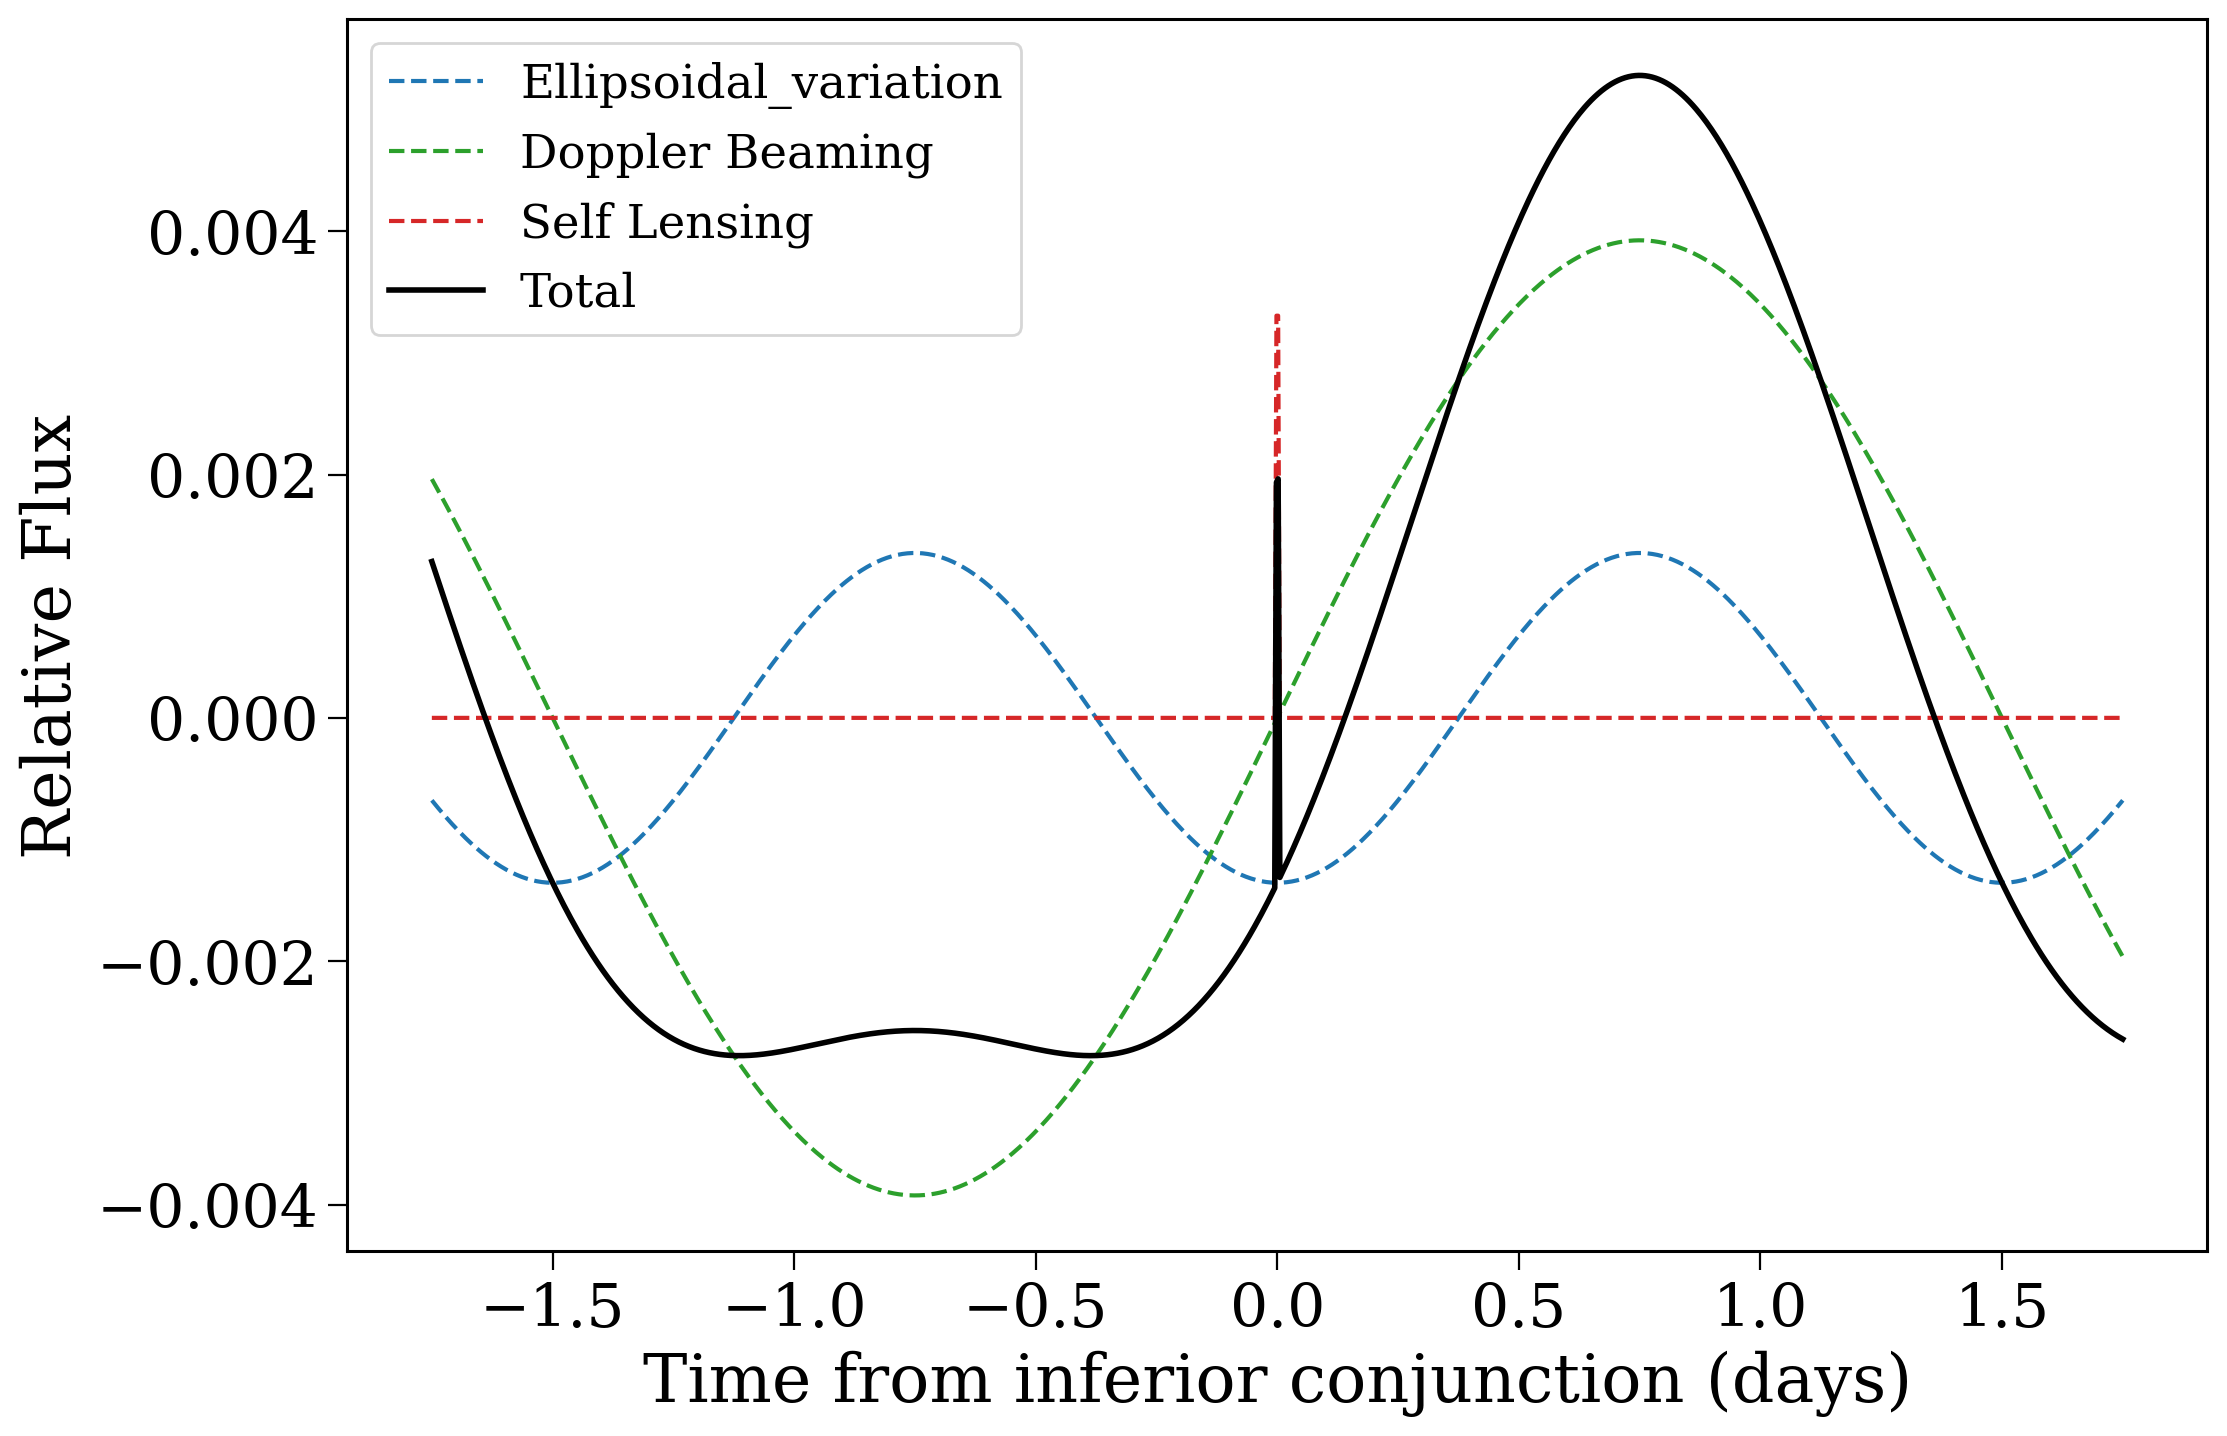

In [10]:
''' 
This is a recreation of the figure 2 plot from the research paper. 
Before building an automatic function, we manually entered numbers first to understand how the code will work
'''

time_conj = np.linspace(-1.75, 1.75, 1000) * u.day
phase = tp_conversion(time_conj, 3 * u.day)

for M_bh in [10] * u.Msun:
    
    ev_vals = ellipsoidal_variation(phase=phase, M_bh=M_bh, M_star=1 * u.Msun, inc=np.pi/2, R_star=1 * u.Rsun, period = 3 * u.day)
    plt.plot(time_conj, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
    db_vals = doppler_beaming(phase = phase, period = 3 * u.day, inc = np.pi/2, M_bh = M_bh , M_star = 1 * u.solMass)
    
    plt.plot(time_conj, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
    sl_vals = self_lensing(phase, M_bh, 1 * u.Msun,1 * u.Rsun,3 * u.day)
    plt.plot(time_conj, sl_vals, label="Self Lensing", color = 'tab:red', linestyle = 'dashed')
    plt.plot(time_conj, 
             relative_flux(
                 time = time_conj,
                 M_bh = M_bh,
                 inc = np.pi/2,
                 R_star = [1] * u.Rsun,
                 period = [3] * u.day,
                 M_star = [1] * u.solMass
             ), 
             label="Total", color = 'black', linewidth = 2)
#phase, M_bh, inc, R_star, period, M_star
plt.legend()
plt.xlabel("Time from inferior conjunction (days)")
plt.ylabel("Relative Flux")
plt.show()


In [11]:
# ''' Defining the function that automatically plots self-lensing and will be used in ipywidgets: '''

# def plt_lensing(M_bh, M_star, inc, R_star, period, day_min, day_max): #deleted time param
#     time_conj = np.arange(day_min, day_max, step = 0.00208333) * u.day
#     phase = tp_conversion(time_conj, period)
    
#     ev_vals = ellipsoidal_variation(
#         phase=phase, 
#         M_bh=M_bh, 
#         M_star=M_star, 
#         inc=inc, 
#         R_star=R_star, 
#         period = period
#     )
#     plt.plot(time_conj, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
#     db_vals = doppler_beaming(
#         phase = phase, 
#         period = period, 
#         inc = inc, 
#         M_bh = M_bh, 
#         M_star = M_star
#     )
    
#     plt.plot(time_conj, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
#     sl_vals = self_lensing(
#         phase = phase, 
#         M_bh = M_bh, 
#         M_star = M_star, 
#         R_star = R_star, 
#         period = period
#     )
#     plt.plot(time_conj, sl_vals, label="Self Lensing", color = 'tab:red', linestyle = 'dashed')
#     plt.plot(time_conj, 
#              relative_flux(
#                  time = time_conj,
#                  M_bh = M_bh,
#                  inc = inc,
#                  R_star = R_star,
#                  period = period,
#                  M_star = M_star
#              ), 
#              label="Total", color = 'black', linewidth = 2)

#     #phase, M_bh, inc, R_star, period, M_star
#     plt.legend()
#     plt.xlabel("Time from inferior conjunction (days)")
#     plt.ylabel("Relative Flux")
#     plt.show()

In [12]:
''' Defining the function that automatically plots self-lensing and will be used in ipywidgets: '''

def plt_lensing(M_bh, M_star, inc, R_star, period, day_min, day_max, noise_max): #deleted time param
    time_conj = np.arange(day_min, day_max, step = 0.00208333) * u.day    #0.00208333 is 3 minutes in days
    phase = tp_conversion(time_conj, period)
    
    ev_vals = ellipsoidal_variation(
        phase=phase, 
        M_bh=M_bh, 
        M_star=M_star, 
        inc=inc, 
        R_star=R_star, 
        period = period
    )
    #plt.plot(time_conj, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
    db_vals = doppler_beaming(
        phase = phase, 
        period = period, 
        inc = inc, 
        M_bh = M_bh, 
        M_star = M_star
    )
    
    #plt.plot(time_conj, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
    sl_vals = self_lensing(
        phase = phase, 
        M_bh = M_bh, 
        M_star = M_star, 
        R_star = R_star, 
        period = period
    )
    #plt.plot(time_conj, sl_vals, label="Self Lensing", color = 'tab:red', linestyle = 'dashed')
    plt.scatter(time_conj, 
                relative_flux(
                 time = time_conj,
                 M_bh = M_bh,
                 inc = inc,
                 R_star = R_star,
                 period = period,
                 M_star = M_star
                ) + np.random.normal(0, noise_max, len(time_conj)),
                label="Total", color = 'black', linewidth = 2)

    #phase, M_bh, inc, R_star, period, M_star
    plt.legend()
    plt.xlabel("Time from inferior conjunction (days)")
    plt.ylabel("Relative Flux")
    plt.show()

In [13]:
# #plt_lensing(M_bh, M_star, inc, R_star, period, time, day_min, day_max)
# plt_lensing(
#     M_bh = 10 * u.Msun, 
#     M_star = 1 * u.Msun, 
#     inc = np.pi/2, 
#     R_star = 1* u.Rsun, 
#     period = 3 * u.day, 
#     time = 1 * u.day, 
#     day_min = -1.75, 
#     day_max = 1.75
# )


# # friday: start using widgets, add sliders one by one and tr

In [14]:
''' 
Building our widget
* to use the interactive widget, make sure to run all cells before this one

we set the default params to reproduce the plot in the research paper:
https://iopscience.iop.org/article/10.3847/1538-4357/ab3a4f/pdf#page=4
'''

def f(mbh_slider, mstar_slider, rstar_slider, period_slider, day_range, noise_slider): #time_slider
    plt_lensing(
        M_bh = mbh_slider * u.Msun,
        M_star = mstar_slider * u.Msun, 
        inc = np.pi/2, 
        R_star = rstar_slider * u.Rsun, 
        period = period_slider * u.day, 
        #time = time_slider * u.day, 
        day_min = day_range[0], 
        day_max = day_range[1],
        noise_max = noise_slider
    )

interactive_plot = interactive(f, 
                               mbh_slider = widgets.FloatSlider(min = 5.0, max = 15.0, value = 10.0, description = 'Mass of Black Hole'),
                               mstar_slider = widgets.FloatSlider(min = 1.0, max = 10.0, value = 1.0, description = 'Mass of Star'),
                               rstar_slider = widgets.FloatSlider(min = 1.0, max = 10.0, value = 1.0, description = 'Radius of Star'),
                               period_slider = widgets.FloatSlider(min = 1.0, max = 5.0, value = 3.0, description = 'Period'),
                               #time_slider = widgets.FloatSlider(min = 1.0, max = 5.0, description = 'Time'),
                               day_range = widgets.FloatRangeSlider(value = [-1.75, 1.75], min = -3.0, max = 3.0, step = 0.25, description = 'Time Range'), #step 3 mins
                               noise_slider = widgets.FloatSlider(min = 1e-10, max = 1e1, value = 1e-5, step = 1e-12, description = 'Noise')
                              )
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='Mass of Black Hole', max=15.0, min=5.0), FloatSlide…